In [ ]:
#Reference https://www.kaggle.com/kredy10/simple-lstm-for-text-classification

FIne tune model
Transfer learning for positive review prediction. Pre-trained model. Transfer learning NLP. 

In [ ]:
#my imports
import numpy as np
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import string
from nltk import pos_tag
import pandas as pd
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_colwidth', -1)
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
pd.set_option("display.max_rows", None, "display.max_columns", None)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


In [ ]:
#Github Links 
#Test Data
negative_car_test = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/negative_car_test.csv')
positive_car_test = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/positive_car_test.csv')
total_car_test = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/total_car_test-2.csv')
#Minimum Data
negative_car_minimum = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/negative_car_minimum.csv')
positive_car_minimum = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/positive_car_minimum.csv')
total_car_minimum = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/total_car_minimum.csv')
#Remainder Data
negative_car_remainder = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/negative_car_remainder.csv')
positive_car_remainder = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/positive_car_remainder.csv')
total_car_remainder = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/total_car_remainder.csv')
#Total Training Data
master_negative_car_training = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/master_negative_car_training_final.csv')
master_positive_car_training = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/master_positive_car_training_final.csv')
total_master_training_final = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/total_master_training_final.csv')



In [ ]:
#Assigning Negative/Positive to copy
negative_car_text = master_negative_car_training.copy()
positive_car_text = master_positive_car_training.copy()

In [ ]:
neg_car_synthetic_df = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/capstone_synthetic_neg_car.csv")

In [ ]:
pos_car_synthetic_df = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/capstone_synthetic_pos_car.csv')

In [ ]:
#Shuffling dataframe
neg_car_synthetic_df = neg_car_synthetic_df.sample(frac=1).reset_index(drop=True)
pos_car_synthetic_df = pos_car_synthetic_df.sample(frac=1).reset_index(drop=True)

In [ ]:
#Important Dataframes

#Test Data Set
total_car_test = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/total_car_test-2.csv')
total_car_test.drop("Unnamed: 0", axis=1,inplace=True)


#Genuine Data Set Full
total_master_training_final = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/total_master_training_final.csv')

#Minimum Data Set
total_car_minimum = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/Car_repair/total_car_minimum.csv')

#Total Genuine and Synthetic Shuffled Dataset Capstone
capstone_final_synth_and_gen_total = pd.concat([neg_car_synthetic_df, pos_car_synthetic_df, total_master_training_final], axis=0).reset_index(drop=True)
capstone_final_synth_and_gen_total.drop("Unnamed: 0", axis=1,inplace=True)

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(total_car_test['text'], total_car_test['rating'], random_state = 0, test_size = .99)


In [ ]:
capstone_final_synth_and_gen_total.head(1)

,rating,text
0,negative,"I took my transmission to a shop that specialize in this area called zenith auto, and they told me that the detail shop did not perform the correct repairs that they said was needed (i took this to mean that they didn't perform the part, they just overlooked it). zenith charged me $90 for them to run fluid through my transmission (which usually doesn't change fluid on high mileage transmissions) then checked everything else, and said that their charge was for something that was broken as the transmission was being worked on. zenith charged $150 to run a battery through my transmission (which usually doesn't happen) and checked everything else, and said that their charge was for something that was just a nasty burn (which basically means there was"


In [ ]:
lstm.head(1)

,rating,text
0,negative,"Just about every good mechanic/ mechanic-shy mechanic will tell you to take your vehicle to the guy closest to you, not the location specified on your car. i chose not to cooperate with the fakes and instead took my vehicle to a reliable shop with a history of working on hot rods. what do you think happened? i should have taken my vehicle to a dealership to properly investigate this matter."" 208,208, ,""i took my car in for an oil change, and as soon as i drove out of the parking space at the entrance to the lot, the check engine light flashed on. my husband and i stood on the side of the road waiting for the light to come on. as soon as the light came on, we"


In [ ]:
#Making LSTM Dataframe
lstm = capstone_final_synth_and_gen_total.copy()

In [ ]:
#ignore
#lstm.drop(["stars"], axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Positive and negative reviews')

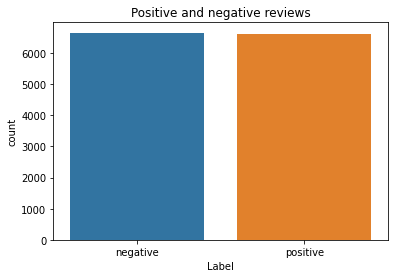

In [ ]:
#Graphic of reviews
sns.countplot(lstm["rating"])
plt.xlabel('Label')
plt.title('Positive and negative reviews')

In [ ]:
# check for missing values
display(capstone_final_synth_and_gen_total.isna().any())
 
# drop any missing values
capstone_final_synth_and_gen_total = capstone_final_synth_and_gen_total.dropna()
 
# make sure they've all been removed.
capstone_final_synth_and_gen_total.isna().any()

rating    False
text      True 
dtype: bool

rating    False
text      False
dtype: bool

In [ ]:
#encoding y in main dataset
y = capstone_final_synth_and_gen_total.rating
x = capstone_final_synth_and_gen_total.text
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [ ]:
#encoding y in test set
lstm_y_test = le.fit_transform(new_y_test)
lstm_y_test = lstm_y_test.reshape(-1,1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)


In [ ]:
x_train.head(1)

11199     Great reviews just moved to calanni's" 547,"took my jeep chris up from canyon city, vegas and it had transmission problems. i called jiffy lube and they recommended air filters. air filters were not needed and not cheap so i did not bother. they gave me free estimates for a new filter and said they 
Name: text, dtype: object

In [ ]:
#paramaters
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)


In [ ]:
#Padding
x_sequences = tok.texts_to_sequences(x_train)
x_sequences_matrix = sequence.pad_sequences(x_sequences,maxlen=max_len)

In [ ]:
#Setting RNN
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
#RNN
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [ ]:
#Fitting LSTM Model
model.fit(x_sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
71/71 [==============================] - 15s 180ms/step - loss: 0.5958 - accuracy: 0.6647 - val_loss: 0.2025 - val_accuracy: 0.9410
Epoch 2/10
71/71 [==============================] - 12s 174ms/step - loss: 0.1578 - accuracy: 0.9447 - val_loss: 0.1032 - val_accuracy: 0.9632
Epoch 3/10
71/71 [==============================] - 12s 175ms/step - loss: 0.0998 - accuracy: 0.9670 - val_loss: 0.1004 - val_accuracy: 0.9623
Epoch 4/10
71/71 [==============================] - 12s 173ms/step - loss: 0.0882 - accuracy: 0.9663 - val_loss: 0.1085 - val_accuracy: 0.9557


In [ ]:
#Sequence Matrixing test set
test_sequences = tok.texts_to_sequences(new_x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
#accuracy testing
accr = model.evaluate(test_sequences_matrix,lstm_y_test)

4/4 [==============================] - 0s 17ms/step - loss: 0.2100 - accuracy: 0.9316
